<h1>The Sparks Foundation Internship</h1>
<h1>Data Science and Business Analytics</h1>
<h1>GRIP SEPT 2021</h1>
<h2>Name :  M.Phani Tarun</h2>
<h2>Task &nbsp;&nbsp;:  Predict the percentage of students based on no. of study hours<h2>

<h2>1.Importing neccessary Libraries and reading the Dataset</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<h2>2.Preprocessing and Linearity Check</h2>

In [3]:
df.isnull().sum() # Gives us the null values in the column

Hours     0
Scores    0
dtype: int64

In [4]:
df.info() # Gives us the Datatype of the elements in the column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:>

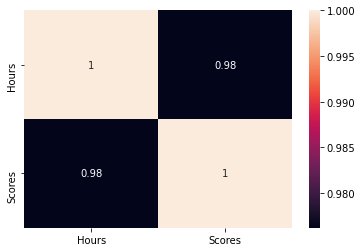

In [6]:
import seaborn as sb
data_corr=df.corr()
sb.heatmap(data_corr,annot=True) # annot=True give the correlation value in heatmap 
# any value in range (-1,-0.7) or (0.7,1) .Then they are better correlated and good for linear regression

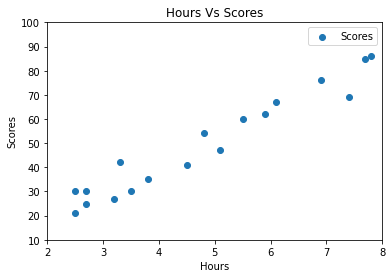

In [7]:
plt.scatter(df['Hours'],df['Scores'])
plt.title("Hours Vs Scores")
plt.xlim(2.3,8)      # x limits  
plt.ylim(10,100)         # y limits
plt.xticks(np.arange(2,8.5,1))  # intervals in x-axis
plt.legend(["Scores"])      # Elements of graph
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

<h2>3.Linear Regression</h2>

In [8]:
from sklearn import linear_model     # linear_model is class available to perform regressions
regress=linear_model.LinearRegression()

x=df[['Hours']]       # double square brackets are used because dataframes will be in matrices. Hence, [['Hours']] means it is matrix in which we are taking only the Hours attribute 
y=df[['Scores']]

# x has independent variable
# y has depenedent variable

regress.fit(x,y)

print("Coefficient(m) :",regress.coef_)
print("Intercept(c) :",regress.intercept_)

Coefficient(m) : [[9.77580339]]
Intercept(c) : [2.48367341]


<h2>4.Regression Line</h2>

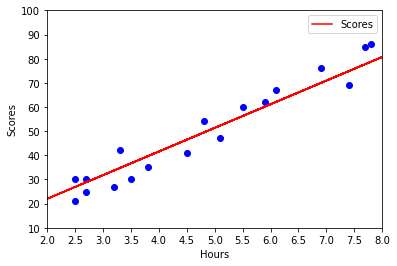

In [9]:
plt.scatter(df['Hours'],df['Scores'],color='blue',label="Actual")
plt.plot(x,regress.coef_[0][0]*x+regress.intercept_[0],color="red",label="Predicted")
plt.xlim(2.3,8)      # x limits  
plt.ylim(10,100)         # y limits
plt.xticks(np.arange(2,8.5,0.5))  # intervals in x-axis
plt.legend(["Scores"])      # Elements of graph
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [10]:
y_predicted=regress.predict(x) # Predicting the Output

<h2>4.Error metrics</h2>

In [11]:
from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(y,y_predicted))
print('Mean Squared Error:',metrics.mean_squared_error(y,y_predicted))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y,y_predicted)))

Mean Absolute Error: 4.972805319866375
Mean Squared Error: 28.882730509245466
Root Mean Squared Error: 5.374265578592619


<h2>5.Training and Testing</h2>

In [12]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(df[['Hours']],df[['Scores']],test_size=0.3)

from sklearn import linear_model
regress=linear_model.LinearRegression()
regress.fit(train_x,train_y)

print("Coefficient(m) :",regress.coef_)
print("Intercept(c) :",regress.intercept_)

Coefficient(m) : [[9.96379136]]
Intercept(c) : [2.11306102]


In [13]:
y_predicted_1=regress.predict(test_x)

In [14]:
from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(test_y,y_predicted_1))
print('Mean Squared Error:',metrics.mean_squared_error(test_y,y_predicted_1))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(test_y,y_predicted_1)))

Mean Absolute Error: 5.119568703891039
Mean Squared Error: 35.353459053708654
Root Mean Squared Error: 5.945877483913426


<h2>6.Predicted Score value if the student studies for 9.25hrs/day </h2>

In [15]:
regress.fit(x,y)
pred=regress.predict([[9.25]])
print("Predicted Output with respect to 100% Training data :",pred[0][0])

regress.fit(train_x,train_y)
pred=regress.predict([[9.25]])
print("Predicted Output with respect to 70% Training data :",pred[0][0])

Predicted Output with respect to 100% Training data : 92.9098547701573
Predicted Output with respect to 70% Training data : 94.27813109131733
